In [77]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
train=pd.read_csv('/media/vinay/4E7E89327E8913BD/Users/Vinay/Downloads/train.csv')
train=train.set_index(['PassengerId'])

test=pd.read_csv('/media/vinay/4E7E89327E8913BD/Users/Vinay/Downloads/test.csv')
test=test.set_index(['PassengerId'])

print(train.head())
print('-------------------------------------------------------------------')
print(test.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [78]:
train['Family Size(inclusive)']=train['SibSp']+train['Parch']+1
test['Family Size(inclusive)']=test['SibSp']+test['Parch']+1

print(train.head())
print('-------------------------------------------------------------------')
print(test.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN       

In [79]:
traindict=pd.DataFrame(train.dtypes)
testdict=pd.DataFrame(test.dtypes)

traindict['Missing Values']=train.isnull().sum()
testdict['Missing Values']=test.isnull().sum()

traindict['Unique Values']=train.nunique()
testdict['Unique Values']=test.nunique()

traindict['Count']=train.count()
testdict['Count']=test.count()

traindict = traindict.rename(columns={0:'DataType'})
testdict = testdict.rename(columns={0:'DataType'})

print(traindict)
print(testdict)

                       DataType  Missing Values  Unique Values  Count
Survived                  int64               0              2    891
Pclass                    int64               0              3    891
Name                     object               0            891    891
Sex                      object               0              2    891
Age                     float64             177             88    714
SibSp                     int64               0              7    891
Parch                     int64               0              7    891
Ticket                   object               0            681    891
Fare                    float64               0            248    891
Cabin                    object             687            147    204
Embarked                 object               2              3    889
Family Size(inclusive)    int64               0              9    891
                       DataType  Missing Values  Unique Values  Count
Pclass              

In [80]:
print(train.describe(include=['object']))
print('-------------------------------------------------------------------')
print(train.describe(include=['number']))
print('-------------------------------------------------------------------')
print('-------------------------------------------------------------------')
print(test.describe(include=['object']))
print('-------------------------------------------------------------------')
print(test.describe(include=['number']))

                                  Name   Sex Ticket Cabin Embarked
count                              891   891    891   204      889
unique                             891     2    681   147        3
top     O'Sullivan, Miss. Bridget Mary  male   1601    G6        S
freq                                 1   577      7     4      644
-------------------------------------------------------------------
         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000 

In [81]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf53c01908>,
      dtype=object)

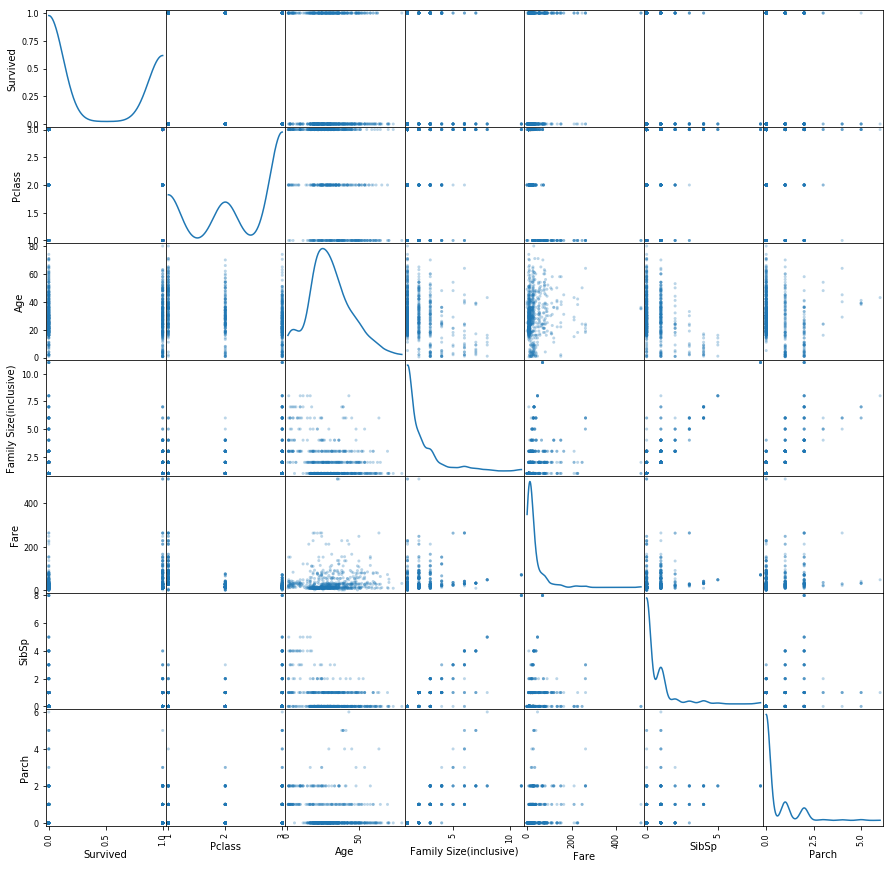

In [82]:
from pandas.plotting import scatter_matrix
col=['Survived','Pclass','Age','Family Size(inclusive)','Fare','SibSp','Parch']
scatter_matrix(train[col[:]],alpha=0.3,figsize=(15,15),diagonal='kde')

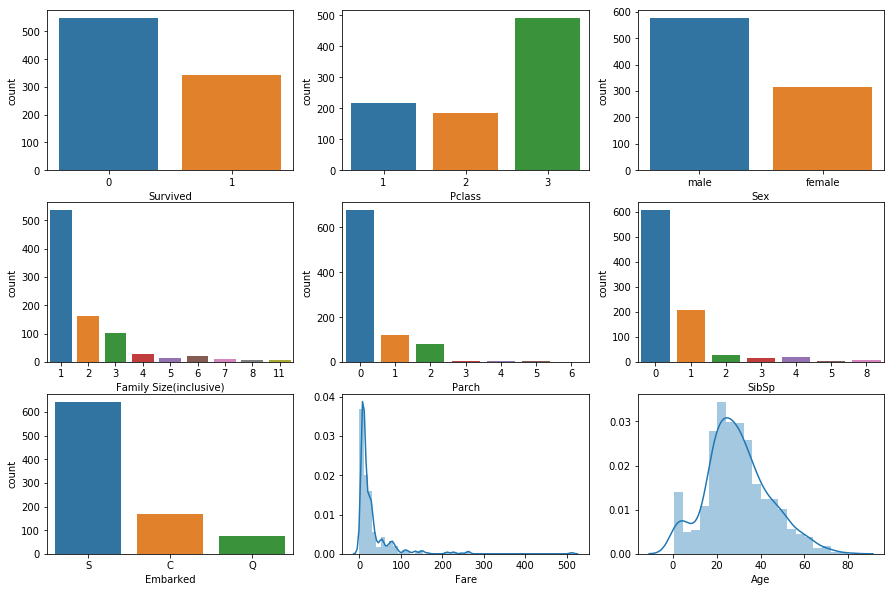

In [83]:
import seaborn as sns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.countplot('Survived',data=train,ax=axes[0,0])
sns.countplot('Pclass',data=train,ax=axes[0,1])
sns.countplot('Sex',data=train,ax=axes[0,2])
sns.countplot('Family Size(inclusive)',data=train,ax=axes[1,0])
sns.countplot('Parch',data=train,ax=axes[1,1])
sns.countplot('SibSp',data=train,ax=axes[1,2])
sns.countplot('Embarked',data=train,ax=axes[2,0])
sns.distplot(train['Fare'], kde=True,ax=axes[2,1])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[2,2])

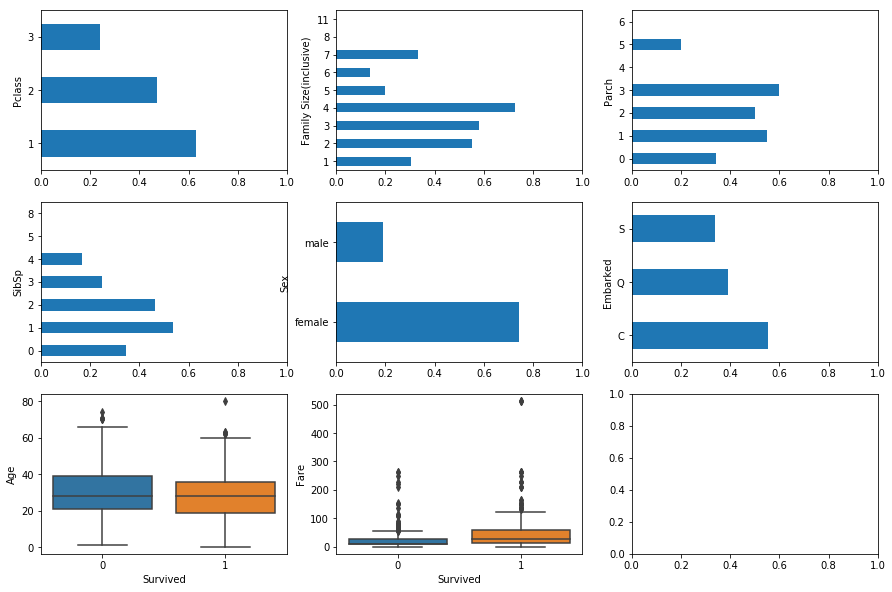

In [84]:
figbi, axesbi = plt.subplots(3, 3, figsize=(15, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('Family Size(inclusive)')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[1,1],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,2],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[2,0])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[2,1])

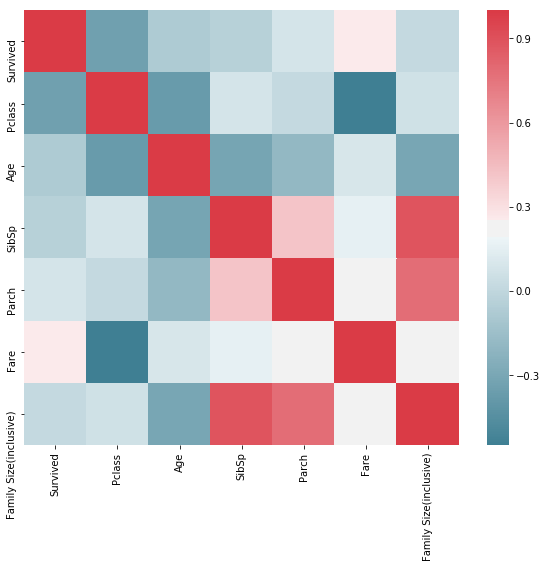

In [85]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [86]:
def reorderPclass(number):
    if number==1:
        return 3
    elif number==3:
        return 1
    else:
        return 2
train['Pclass']=train['Pclass'].apply(reorderPclass)
test['Pclass']=test['Pclass'].apply(reorderPclass)

def SexEmbarked(word):
    return str(word)

train['Sex']=train['Sex'].apply(SexEmbarked)
train['Embarked']=train['Embarked'].apply(SexEmbarked)

test['Sex']=test['Sex'].apply(SexEmbarked)
test['Embarked']=test['Embarked'].apply(SexEmbarked)

print(train.head(10))
print(test.head(10))

             Survived  Pclass  \
PassengerId                     
1                   0       1   
2                   1       3   
3                   1       1   
4                   1       3   
5                   0       1   
6                   0       1   
7                   0       3   
8                   0       1   
9                   1       1   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                          

In [87]:
train.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
test.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
print(train.head(10))
print('-------------------------------------------------------------------')
print(test.head(10))

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
PassengerId                                                                   
1                   0       1    male  22.0      1      0   7.2500        S   
2                   1       3  female  38.0      1      0  71.2833        C   
3                   1       1  female  26.0      0      0   7.9250        S   
4                   1       3  female  35.0      1      0  53.1000        S   
5                   0       1    male  35.0      0      0   8.0500        S   
6                   0       1    male   NaN      0      0   8.4583        Q   
7                   0       3    male  54.0      0      0  51.8625        S   
8                   0       1    male   2.0      3      1  21.0750        S   
9                   1       1  female  27.0      0      2  11.1333        S   
10                  1       2  female  14.0      1      0  30.0708        C   

             Family Size(inclusive)  
PassengerId  

In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#train[['Sex','Embarked']]=train[['Sex','Embarked']].apply(LabelEncoder().fit_transform)

#test[['Sex','Embarked']]=test[['Sex','Embarked']].apply(LabelEncoder().fit_transform)

#train.fillna('',inplace=True)
#test.fillna('',inplace=True)

oh = pd.get_dummies(train['Sex'])
train = train.drop('Sex',axis = 1)
train = train.join(oh)
oh1 = pd.get_dummies(train['Embarked'])
train = train.drop('Embarked',axis = 1)
train = train.join(oh1)

oh2 = pd.get_dummies(test['Sex'])
test = test.drop('Sex',axis = 1)
test = test.join(oh2)
oh3 = pd.get_dummies(test['Embarked'])
test = test.drop('Embarked',axis = 1)
test = test.join(oh3)

print(train.head(10))
print('-------------------------------------------------------------------')
print(test.head(10))

             Survived  Pclass   Age  SibSp  Parch     Fare  \
PassengerId                                                  
1                   0       1  22.0      1      0   7.2500   
2                   1       3  38.0      1      0  71.2833   
3                   1       1  26.0      0      0   7.9250   
4                   1       3  35.0      1      0  53.1000   
5                   0       1  35.0      0      0   8.0500   
6                   0       1   NaN      0      0   8.4583   
7                   0       3  54.0      0      0  51.8625   
8                   0       1   2.0      3      1  21.0750   
9                   1       1  27.0      0      2  11.1333   
10                  1       2  14.0      1      0  30.0708   

             Family Size(inclusive)  female  male  C  Q  S  nan  
PassengerId                                                      
1                                 2       0     1  0  0  1    0  
2                                 2       1     0  1  0  

In [89]:
from fancyimpute import MICE
solver=MICE(n_imputations=20)

train_numeric = train.select_dtypes(include=[np.number]).as_matrix()
train_new=pd.DataFrame(data=solver.complete(train_numeric), columns=train.columns, index=train.index)

test_numeric = test.select_dtypes(include=[np.number]).as_matrix()
test_new=pd.DataFrame(data=solver.complete(test_numeric), columns=test.columns, index=test.index)

print(train_new.head(20))
print('-------------------------------------------------------------------')
print(test_new.head(20))

[MICE] Completing matrix with shape (891, 13)
[MICE] Starting imputation round 1/30, elapsed time 0.001
[MICE] Starting imputation round 2/30, elapsed time 0.001
[MICE] Starting imputation round 3/30, elapsed time 0.002
[MICE] Starting imputation round 4/30, elapsed time 0.003
[MICE] Starting imputation round 5/30, elapsed time 0.004
[MICE] Starting imputation round 6/30, elapsed time 0.005
[MICE] Starting imputation round 7/30, elapsed time 0.006
[MICE] Starting imputation round 8/30, elapsed time 0.007
[MICE] Starting imputation round 9/30, elapsed time 0.009
[MICE] Starting imputation round 10/30, elapsed time 0.009
[MICE] Starting imputation round 11/30, elapsed time 0.011
[MICE] Starting imputation round 12/30, elapsed time 0.012
[MICE] Starting imputation round 13/30, elapsed time 0.013
[MICE] Starting imputation round 14/30, elapsed time 0.014
[MICE] Starting imputation round 15/30, elapsed time 0.015
[MICE] Starting imputation round 16/30, elapsed time 0.017
[MICE] Starting imp

/home/vinay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/vinay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [90]:
train_new.drop(['nan'], axis=1, inplace=True)
print(train_new.columns)
print(test_new.columns)
print(train_new.head(20))
print(test_new.head(20))

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family Size(inclusive)', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family Size(inclusive)',
       'female', 'male', 'C', 'Q', 'S'],
      dtype='object')
             Survived  Pclass        Age  SibSp  Parch     Fare  \
PassengerId                                                       
1                 0.0     1.0  22.000000    1.0    0.0   7.2500   
2                 1.0     3.0  38.000000    1.0    0.0  71.2833   
3                 1.0     1.0  26.000000    0.0    0.0   7.9250   
4                 1.0     3.0  35.000000    1.0    0.0  53.1000   
5                 0.0     1.0  35.000000    0.0    0.0   8.0500   
6                 0.0     1.0  28.584461    0.0    0.0   8.4583   
7                 0.0     3.0  54.000000    0.0    0.0  51.8625   
8                 0.0     1.0   2.000000    3.0    1.0  21.0750   
9                 1.0     1.0  27.000000

In [91]:
#from sklearn.feature_selection import chi2
#scores,pvalues=chi2(train_new.iloc[:,1:].values,train_new.iloc[:,1].values)
#print(pvalues)

x,y=train_new.iloc[:,1:].values,train_new.iloc[:,0].values

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x,y)

x_test=test_new.iloc[:,:].values
y_pred=classifier.predict(x_test)

#print(len(x_test))
#print('----------------------------------------------------')

print(y_pred)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.

In [95]:
d = {'PassengerId':test_new.index,'Survived':y_pred}
answer = pd.DataFrame(data=d)
answer=answer.set_index(['PassengerId'])
answer.to_csv('Titanic.csv')
print(answer.head())

             Survived
PassengerId          
892               0.0
893               0.0
894               0.0
895               1.0
896               0.0


In [92]:
tt=pd.read_csv('/media/vinay/4E7E89327E8913BD/Users/Vinay/Downloads/gender_submission.csv')
y_test=tt.iloc[:,1].values

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print(cm)

[[228  38]
 [ 31 121]]


In [93]:
from sklearn.naive_bayes import GaussianNB
classifierNB=GaussianNB()
classifierNB.fit(x,y)

y_predNB=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cmNB=confusion_matrix(y_test,y_predNB)

print(cmNB)

[[228  38]
 [ 31 121]]


In [94]:
from sklearn.svm import SVC
classifierSVC=SVC(random_state=0)
classifierSVC.fit(x,y)

y_predSVC=classifierSVC.predict(x_test)

from sklearn.metrics import confusion_matrix
cmSVC=confusion_matrix(y_test,y_predSVC)

print(cmSVC)

[[205  61]
 [ 57  95]]


/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
